# Hyperparameters and Parameters
>  In this introductory chapter you will learn the difference between hyperparameters and parameters. You will practice extracting and analyzing parameters, setting hyperparameter values for several popular machine learning algorithms. Along the way you will learn some best practice tips & tricks for choosing which hyperparameters to tune and what values to set & build learning curves to analyze your hyperparameter choices.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 1 exercises "Hyperparameter Tuning in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)
from sklearn.model_selection import train_test_split

## Introduction & 'Parameters'

### Parameters in Logistic Regression

<div class=""><p>Now that you have had a chance to explore what a parameter is, let us apply this knowledge. It is important to be able to review any new algorithm and identify which elements are parameters and hyperparameters. </p>
<p>Which of the following is a parameter for the Scikit Learn logistic regression model? Here we mean <em>conceptually</em> based on the theory introduced in this course. <strong>NOT</strong> what the Scikit Learn documentation calls a parameter or attribute.</p></div>

<pre>
Possible Answers
n_jobs
<b>coef_</b>
class_weight
LogisticRegression()
</pre>

**coef_ contains the important information about coefficients on our variables in the model. We do not set this, it is learned by the algorithm through the modeling process.**

### Extracting a Logistic Regression parameter

<div class=""><p>You are now going to practice extracting an important parameter of the logistic regression model. The logistic regression has a few other parameters you will not explore here but you can review them in the <a href="https://scikit-learn.org" target="_blank" rel="noopener noreferrer">scikit-learn.org</a> documentation for the <code>LogisticRegression()</code> module under 'Attributes'.</p>
<p>This parameter is important for understanding the direction and magnitude of the effect the variables have on the target.</p>
<p>In this exercise we will extract the coefficient parameter (found in the <code>coef_</code> attribute), zip it up with the original column names, and see which variables had the largest positive effect on the target variable.</p>
<p>You will have available:</p>
<ul>
<li>A logistic regression model object named <code>log_reg_clf</code></li>
<li>The <code>X_train</code> DataFrame</li>
</ul>
<p><code>sklearn</code> and <code>pandas</code> have been imported for you.</p></div>

In [ ]:
df = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/20-hyperparameter-tuning-in-python/datasets/credit-card-full.csv')
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)
X = df.drop(['ID', 'default payment next month'], axis=1)
y = df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_clf = LogisticRegression(max_iter=500)
log_reg_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Instructions
<ul>
<li>Create a list of the original column names used in the training DataFrame.</li>
<li>Extract the coefficients of the logistic regression estimator.</li>
<li>Create a DataFrame of coefficients and variable names &amp; view it.</li>
<li>Print out the top 3 'positive' variables based on the coefficient size.</li>
</ul>

In [ ]:
# Create a list of original variable names from the training DataFrame
original_variables = X_train.columns

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
print(coefficient_df)

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by=["Coefficient"], axis=0, ascending=False)[0:3]
print(top_three_df)

       Variable   Coefficient
0     LIMIT_BAL -3.124777e-06
1           AGE -1.597352e-02
2         PAY_0  1.172544e-03
3         PAY_2  9.126886e-04
4         PAY_3  8.005626e-04
5         PAY_4  7.836447e-04
6         PAY_5  7.166980e-04
7         PAY_6  6.451070e-04
8     BILL_AMT1 -1.224000e-05
9     BILL_AMT2  8.285248e-06
10    BILL_AMT3  2.828969e-06
11    BILL_AMT4 -4.474812e-07
12    BILL_AMT5  3.965228e-06
13    BILL_AMT6  2.268837e-06
14     PAY_AMT1 -3.175764e-05
15     PAY_AMT2 -2.034325e-05
16     PAY_AMT3 -1.014893e-05
17     PAY_AMT4 -1.078149e-05
18     PAY_AMT5 -4.208001e-06
19     PAY_AMT6 -1.503642e-06
20        SEX_2 -3.834333e-04
21  EDUCATION_1 -1.134765e-04
22  EDUCATION_2 -2.757021e-04
23  EDUCATION_3 -9.856098e-05
24  EDUCATION_4 -7.723053e-06
25  EDUCATION_5 -1.947821e-05
26  EDUCATION_6 -2.736949e-06
27   MARRIAGE_1 -9.279319e-05
28   MARRIAGE_2 -4.155817e-04
29   MARRIAGE_3 -7.569824e-06
  Variable  Coefficient
2    PAY_0     0.001173
3    PAY_2     0.00091

**You have succesfully extracted and reviewed a very important parameter for the Logistic Regression Model. The coefficients of the model allow you to see which variables are having a larger or smaller impact on the outcome. Additionally the sign lets you know if it is a positive or negative relationship.**

### Extracting a Random Forest parameter

<div class=""><p>You will now translate the work previously undertaken on the logistic regression model to a random forest model. A parameter of this model is, for a given tree, how it decided to split at each level.</p>
<p>This analysis is not as useful as the coefficients of logistic regression as you will be unlikely to ever explore every split and every tree in a random forest model. However, it is a very useful exercise to peak under the hood at what the model is doing.</p>
<p>In this exercise we will extract a single tree from our random forest model, visualize it and programmatically extract one of the splits. </p>
<p>You have available:</p>
<ul>
<li>A random forest model object, <code>rf_clf</code></li>
<li>An image of the top of the chosen decision tree, <code>tree_viz_image</code></li>
<li>The <code>X_train</code> DataFrame &amp; the <code>original_variables</code> list</li>
</ul></div>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz
rf_clf = RandomForestClassifier(max_depth=4, criterion='gini', n_estimators=10);
rf_clf.fit(X_train, y_train);

Instructions
<ul>
<li>Extract the 7th tree (6th index) from the random forest model.</li>
<li>Visualize this tree (<code>tree_viz_image</code>) to see the split decisions.</li>
<li>Extract the feature &amp; level of the top split.</li>
<li>Print out the feature and level together.</li>
</ul>

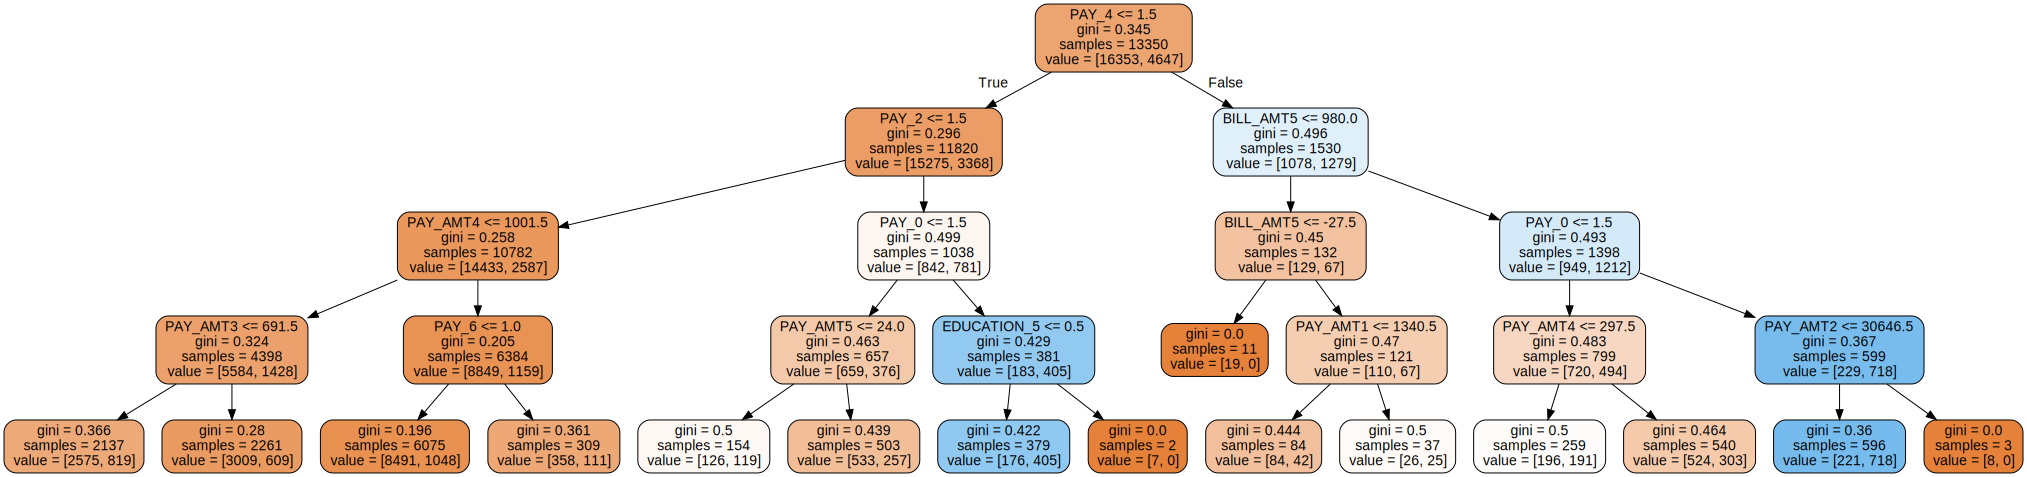

In [ ]:
# Extract the 7th (index 6) tree from the random forest
chosen_tree = rf_clf.estimators_[6]

dot_data = export_graphviz(chosen_tree,
                out_file=None,
                feature_names=X_train.columns,
                filled=True,
                rounded=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Extract the parameters and level of the top (index 0) node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]

# Print out the feature and level
print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))

This node split on feature PAY_4, at a value of 1.5


**You visualized and extracted some of the parameters of a random forest model.**

### Hyperparameters in Random Forests

<div class=""><p>As you saw, there are many different hyperparameters available in a Random Forest model using Scikit Learn. Here you can remind yourself how to differentiate between a hyperparameter and a parameter, and easily check whether something is a hyperparameter. </p>
<p>You can create a random forest estimator yourself from the imported Scikit Learn package. Then print this estimator out to see the hyperparameters and their values.</p>
<p>Which of the following is a hyperparameter for the Scikit Learn random forest model?</p></div>

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<pre>
Possible Answers
<b>oob_score</b>
classes_
trees
random_level
</pre>

**oob_score set to True or False decides whether to use out-of-bag samples to estimate the generalization accuracy.**

### Exploring Random Forest Hyperparameters

<div class=""><p>Understanding what hyperparameters are available and the impact of different hyperparameters is a core skill for any data scientist. As models become more complex, there are many different settings you can set, but only some will have a large impact on your model. </p>
<p>You will now assess an existing random forest model (it has some bad choices for hyperparameters!) and then make better choices for a new random forest model and assess its performance.</p>
<p>You will have available:</p>
<ul>
<li><code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code> DataFrames</li>
<li>An existing pre-trained random forest estimator, <code>rf_clf_old</code></li>
<li>The predictions of the existing random forest estimator on the test set, <code>rf_old_predictions</code></li>
</ul></div>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
rf_clf_old = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2, 
                                    n_estimators=5, oob_score=False, random_state=42)
rf_clf_old.fit(X_train, y_train)
rf_old_predictions = rf_clf_old.predict(X_test)

Instructions 1/3
<li>Print out the hyperparameters of the existing random forest classifier by printing the estimator and then create a confusion matrix and accuracy score from it. The test set <code>y_test</code> and the old predictions <code>rf_old_predictions</code> will be quite useful!</li>

In [ ]:
# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  	confusion_matrix(y_test, rf_old_predictions),
  	accuracy_score(y_test, rf_old_predictions))) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Confusion Matrix: 

 [[6334  667]
 [1249  750]] 
 Accuracy Score: 

 0.7871111111111111


Instructions 2/3
<li>Create a new random forest classifier with a better <code>n_estimators</code> (try 500) then fit this to the data and obtain predictions.</li>

In [ ]:
# Create a new random forest classifier with better hyperparamaters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# Fit this to the data and obtain predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

Instructions 3/3
<li>Assess the performance of the new random forest classifier. Create the confusion matrix and accuracy score and print them out. How does this compare to the first model you were given?</li>

In [ ]:
# Assess the new model (using new predictions!)
print("Confusion Matrix: \n\n", confusion_matrix(y_test, rf_new_predictions))
print("Accuracy Score: \n\n", accuracy_score(y_test, rf_new_predictions))

Confusion Matrix: 

 [[6599  402]
 [1265  734]]
Accuracy Score: 

 0.8147777777777778


**We got a nice 5% accuracy boost just from changing the n_estimators. You have had your first taste of hyperparameter tuning for a random forest model.**

### Hyperparameters of KNN

<div class=""><p>To apply the concepts learned in the prior exercise, it is good practice to try out learnings on a new algorithm. The k-nearest-neighbors algorithm is not as popular as it used to be but can still be an excellent choice for data that has groups of data that behave similarly. Could this be the case for our credit card users? </p>
<p>In this case you will try out several different values for one of the core hyperparameters for the knn algorithm and compare performance. </p>
<p>You will have available:</p>
<ul>
<li><code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code> DataFrames</li>
</ul></div>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Instructions
<ul>
<li>Build a knn estimator for the following values of <code>n_neighbors</code> [5,10,20].</li>
<li>Fit each to the training data and produce predictions.</li>
<li>Get an accuracy score for each model and print them out.</li>
</ul>

In [ ]:
# Build a knn estimator for each value of n_neighbours
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# Fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# Get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))

The accuracy of 5, 10, 20 neighbours was 0.756, 0.7757777777777778, 0.7787777777777778


**You succesfully tested 3 different options for 1 hyperparameter, but it was pretty exhausting. Next, we will try to find a way to make this easier.**

## Setting & Analyzing Hyperparameter Values

### Automating Hyperparameter Choice

<div class=""><p>Finding the best hyperparameter of interest without writing hundreds of lines of code for hundreds of models is an important efficiency gain that will greatly assist your future machine learning model building. </p>
<p>An important hyperparameter for the GBM algorithm is the learning rate. But which learning rate is best for this problem? By writing a loop to search through a number of possibilities, collating these and viewing them you can find the best one. </p>
<p>Possible learning rates to try include 0.001, 0.01, 0.05, 0.1, 0.2 and 0.5</p>
<p>You will have available <code>X_train</code>, <code>X_test</code>, <code>y_train</code> &amp; <code>y_test</code> datasets, and <code>GradientBoostingClassifier</code> has been imported for you.</p></div>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Instructions
<ul>
<li>Create a <code>learning_rates</code> list for the learning rates, and a <code>results_list</code> to hold the accuracy score of your predictions.</li>
<li>Write a loop to create a GBM model for each learning rate mentioned and create predictions for each model.</li>
<li>Save the learning rate and accuracy score to a <code>results_list</code>.</li>
<li>Turn the results list into a DataFrame and print it out.</li>
</ul>

In [ ]:
# Set the learning rates & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for lr in learning_rates:
    model = GradientBoostingClassifier(learning_rate=lr)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Save the learning rate and accuracy score
    results_list.append([lr, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

   learning_rate  accuracy
0          0.001  0.777889
1          0.010  0.820556
2          0.050  0.823556
3          0.100  0.822778
4          0.200  0.821222
5          0.500  0.815556


**You efficiently tested a few different values for a single hyperparameter and can easily see which learning rate value was the best. Here, it seems that a learning rate of 0.05 yields the best accuracy.**

### Building Learning Curves

<div class=""><p>If we want to test many different values for a single hyperparameter it can be difficult to easily view that in the form of a DataFrame. Previously you learned about a nice trick to analyze this. A graph called a 'learning curve' can nicely demonstrate the effect of increasing or decreasing a particular hyperparameter on the final result.</p>
<p>Instead of testing only a few values for the learning rate, you will test many to easily see the effect of this hyperparameter across a large range of values. A useful function from NumPy is <code>np.linspace(start, end, num)</code> which allows you to create a number of values (<code>num</code>) evenly spread within an interval (<code>start</code>, <code>end</code>) that you specify.</p>
<p>You will have available <code>X_train</code>, <code>X_test</code>, <code>y_train</code> &amp; <code>y_test</code> datasets.</p></div>

Instructions
<ul>
<li>Create a list of 30 learning rates evenly spread between 0.01 and 2.</li>
<li>Create a similar loop to last exercise but just save out accuracy scores to a list.</li>
<li>Plot the learning rates against the accuracy score.</li>
</ul>

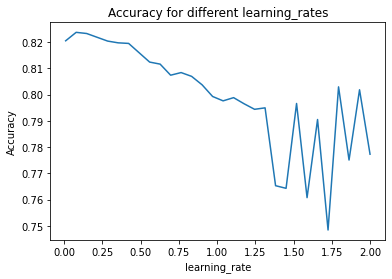

In [ ]:
# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
  	# Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results    
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()

**You can see that for low values, you get a pretty good accuracy. However once the learning rate pushes much above 1.5, the accuracy starts to drop. You have learned and practiced a useful skill for visualizing large amounts of results for a single hyperparameter.**